Perusprosessissa Data Wrangling 
<br>
https://en.wikipedia.org/wiki/Data_wrangling
<br>
eli datan valmistelu (ETL putsaus jne) vie yleensä 80% työajasta. Datan valmistelu koneoppimisen malleja varten:
<br>
https://nbviewer.jupyter.org/github/taanila/tilastoapu/blob/master/datan_valmistelu.ipynb
<br>
Luokittele sen jälkeen pystyrivit (sarakkeet) joko kategorisiin tai määrällisiin. Ja esitä analytiikan osa-alueen (perinteisen neliportaisen tason) mukaisia, siis ihmismielelle mielekkäitä, kysymyksiä aineistolle:


#### Ennakoiva analytiikka: Koneoppiminen
https://tilastoapu.wordpress.com/2019/08/03/koneoppiminen-ja-scikit-learn-kirjasto/
#### Lähestyminen valitaan sen mukaan<br>1. onko jo etukäteen saatavilla ennustettavan muuttujan todellisia arvoja (label) vahvistettuina tietoina (training set eli opetusdata, supervised learning)<br>2. vai ei (unsupervised learning) ja kolmantena mahdollisuutena on<br>3. algoritmin palkitseminen tai rankaiseminen (reinforcement learning) sen suorittaessa analytiikkaa

Koneoppiminen opetusdatasta (supervised learning):
<br>
Lähestyminen valitaan sen mukaan onko ennustettavan muuttujan (target) arvot kategorisia (discrete label) vai määrällisiä (continuous label):
<br>
Kategoriselle muuttujalle luokittelumalli
<br>
Määrälliselle muuttujalle regressio-malli
<br>
Feature matrix tarkoittaa muuttujia, jotka selittävät ennustettavaa muuttujaa (target)
<br>
<font color="grey">Koneoppiminen ilman opetusdataa (unsupervised learning):
<br>
Klusterointi-malli (pyritään löytämään yhteen kuuluvat havainnot, esim. K-means)
<br>
Yksinkertaistamisen malli (core: pienin mahdollinen määrä muuttujia joka selittää riittävästi asiaa, esim. pääkomponenttianalyysi)
<br>
<i>Syvä oppiminen (deep learning) pohjautuu neuroverkkomenetelmiin, joilla pyritään myös jäljittelemään ihmisaivojenkin toimintaa</i>
</font>

SUPERVISED LEARNING (<b><font color="red">eri malleja pitää vaan työläästi kokeilla</font></b>)
<br>
<b>Luokittelumalleja kategoriselle target muuttujalle</b>:
<br>
K lähintä naapuria (K nearest neighbor), Päätöspuut (decision trees), Gaussian Naiivi Bayes, Logistinen regressio.
<br>
käyttötarkoituksena esim:
<br>
OCR (Optical Character Recognition) eli kuvapikseleistä esim. auton rekisterinumeron muuttaminen tekstiksi, kuvapikseleistä esineen tunnistaminen, röntgenkuvasta sairauden tunnistaminen, maksuhäiriöön ajautumisen todennäköisyys, vakuutuspetos, roskapostin suodatus jne
<br>
HUOM! Mikäli kategorista targettia selittävään feature matrixiin otetaan mukaan kategorisia muuttujia, tulee ne kategoriset feature matrixin selittävät muuttujat muuttaa dikotomisiksi dummy muuttujiksi eli nolliksi ja ykkösiksi pandas kirjaston 'get_dummies()' komennolla
<br>
df_dummies = pd.get_dummies(df)
<br>
HUOM! Yllä oleva komento muuttaa data framen kaikki tekstimuotoiset kategoriset muuttujat dummyiksi, mutta jos kategorinen muuttuja on muuta muotoa, niin silloin tulee antaa lisäparametreilla pandakselle tieto mitkä sarakkeet muutetaan 
<br>
<br>
<b>Useimmiten regressiomalli on target määrälliselle muuttujalle tarkoituksenmukaisin</b> (selittävä feature matrix on määrällinen muuttuja, koska korrelaatio):
<br>
lineaarinen regressio (etsitään suora viiva joka parhaiten kulkee havaintojen kautta)
<br>
käyttötarkoituksena esim:
<br>
kysynnän ennustaminen, asunnon hinta (onko saunaa, parveketta tms), käytetyn auton hinta jne


LUOKITTELU

In [1]:
#Tuodaan käytettäväksi data-analytiikan kirjasto pandas ja
#lyhennetään sitä kutsuttavaksi aliaksella pd
## https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe
import pandas as pd

#Tuodaan graafiseen esittämiseen matplotlib ja sen käyttöliittymäksi pyplot
## https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html?highlight=pyplot#module-matplotlib.pyplot
import matplotlib.pyplot as plt

#Vaaditaan vanhoissa Juptter Notebook versioissa, jotta kaaviot tulostuvat
%matplotlib inline

#Katsotaan millaisia erilaisia muotoilutyylejä on saatavilla
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [2]:
#Valitaan graafinen esittäminen muotoiltavaksi tietyllä tyylillä
plt.style.use('seaborn-whitegrid')

#Asetetaan näytettävien rivien rajoite (ei rajoitetta)
pd.options.display.max_rows = None
#Asetetaan näytettävien sarakkeiden rajoite (ei rajoitetta)
pd.options.display.max_columns = None

#Tuodaan graafisen esittämisen tyylimäärittelyt erilaisilla kaaviolajeilla
#ja käytetään tätä tarvittaessa matplotlib esitysten "ylikirjoittamiseen"
#(korvaamiseen silloin kun on silmälle mukavampia vaihtoehtoja tarjolla)
import seaborn as sns

# Harjoitteluun tarkoitettu datasetti Kurjenmiekat-kasveista (englanniksi iris) löytyy seaborn-kirjastosta
## https://fi.wikipedia.org/wiki/Kurjenmiekat
iris = sns.load_dataset('iris')

#Tarkistetaan lähdetiedoston metatiedoista monessako sarakkeessa on
#minkäkin verran arvoja ja mitä tyyppiä ne sisältää
iris.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
#Kurkataan 5 vikaa riviä niinkuin Linuxissa ja nähdään sitenkin rivien määrä
iris.tail()
##tai 5 ekaa riviä
##iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [4]:
#Näytetään kolme pienintä arvoa sarakkeesta 'petal_length' 
iris.nsmallest(n=3,columns='petal_length')

,sepal_length,sepal_width,petal_length,petal_width,species
22,4.6,3.6,1.0,0.2,setosa
13,4.3,3.0,1.1,0.1,setosa
14,5.8,4.0,1.2,0.2,setosa


In [5]:
#Näytetään kolme suurinta arvoa sarakkeesta 'petal_length' 
iris.nlargest(n=3,columns='petal_length')

,sepal_length,sepal_width,petal_length,petal_width,species
118,7.7,2.6,6.9,2.3,virginica
117,7.7,3.8,6.7,2.2,virginica
122,7.7,2.8,6.7,2.0,virginica


In [6]:
#Numeromuotoisen sarakkeen suodatus
##Noudetaan data framesta Pandas kirjaston toiminnolla ne rivt, joissa
#sarakkeen 'petal_length arvo on suurempi kuin 6.3 (suodatetaan rajoittimella > 6.3) 
iris[ iris['petal_length'] > 6.3 ]
##Uloimmat hakasulut viittaavat muuttujan iris "alkioon" / sarakkeeseen ja
#niiden hakasulkujen sisällä suoritetaan suodatus

,sepal_length,sepal_width,petal_length,petal_width,species
105,7.6,3.0,6.6,2.1,virginica
117,7.7,3.8,6.7,2.2,virginica
118,7.7,2.6,6.9,2.3,virginica
122,7.7,2.8,6.7,2.0,virginica
131,7.9,3.8,6.4,2.0,virginica


Yllä olevassa taulukossa
<br>
sepal = verholehti
<br>
https://fi.wikipedia.org/wiki/Verhi%C3%B6
<br>
petal = terälehti
<br>
https://fi.wikipedia.org/wiki/Teri%C3%B6
<br>
Lajikkeet ovat Setosa, Versicolor ja Virginica

In [7]:
#Mahdollisten tyhjien arvojen tarkistus
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

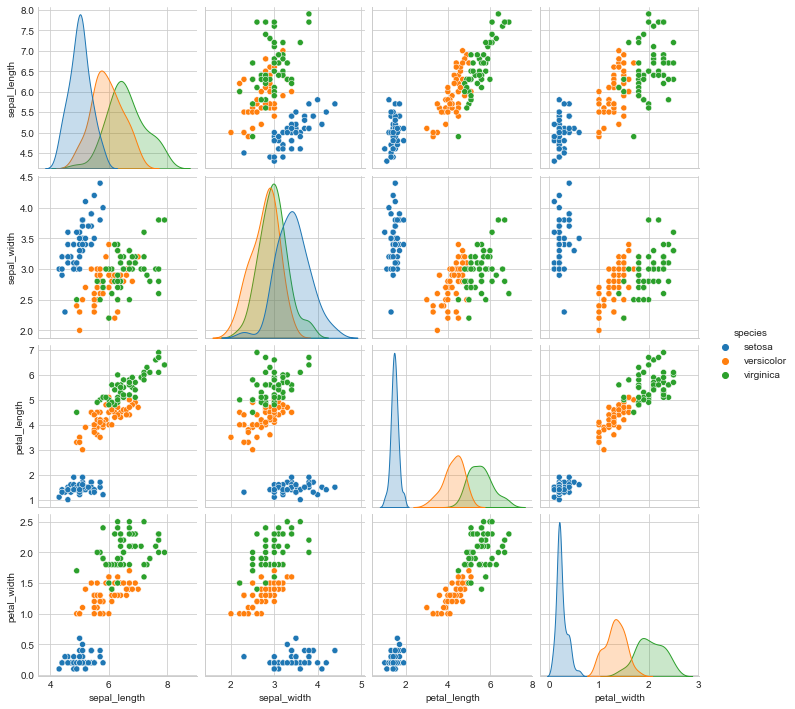

In [8]:
#Hajontakaaviossa voi kategorisen muuttujan eri arvoja esittää eri väreillä
sns.pairplot(iris, hue='species')

Tiedon esittäminen visualisoituna (datasetin aineistosta graafisessa muodossa) paljastaa hyvin havainnollistavasti alarivillä Y-akselin 'petal_width' ja X-akselin 'petal_length' leikkauspisteen ruudukossa kuinka Setosa-lajike erottautuu selkeästi muista Kurjenmiekoista (iris) pelkästään petal (terälehti) pituuden ja leveyden osalta.
<br>
<br>
Yhtä selkeää eroa ei ole nähtävissä Versicolor ja Virginica lajikkeiden toisistaan erotteluun


Ottamalla kaikki verho- ja terälehti muuttujat ('sepal_length', 'sepal_width', 'petal_length' ja 'petal_width') mukaan feature matrixiin voitaneen koulutusdatasta kouluttaa hyvin osuva koneoppimisen malli, joka oppii lajittelemaan Kurjenmiekan sen verho- ja terälehtien mittojen mukaan tarkoituksenmukaiseen targettiin (lajikkeeseen). <b><font color="red">Eri malleja pitää vaan työläästi kokeilla</font></b>

Datan valmistelua (Data Wrangling) sen jakamiseksi koulutusdataan ja testidataan

In [9]:
#Ei asenneta Anacondassa vaan kerrotaan mistä "from foo.bar" tuodaan käytettäväksi "import lorem_ipsus"
##toiminnallisuus, joka jakaa datan
from sklearn.model_selection import train_test_split

#Vakiintuneen tavan mukaan feature matrix (selittävä muuttuja) on iso X
##Poistetaan lajitieto
X = iris.drop('species', axis=1)

#Vakiintuneen tavan mukaan target (ennustettava muuttuja) on y
y = iris['species']

#random_state arvo määrittelee miten data erotellaan opetus- ja testidataan
##eri kokeilukerroilla tulee käyttää samaa arvoa (arvolla itsellään ei ole mitään merkitystä)
##sillä jos aineisto on jaettu eri tavalla osiin voi päätyä hyvinkin erilaiseen malliin
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)
###Käytännössä datasetissä otoksen jakamisen 'random_state' arvolla on
###jonkilainen vaikutus ennustusprosentin osumatarkkuuteen
### X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
#HUOM! Ennen tuotantoon deployausta toistetaan splittausta moneen eri kertaan eri jaotusarvoilla
#ja tuotantoon pääty niistä kokeiluista jonkilainen keskiarvon tyyppinen ratkaisu


#Katsotaan millaisiin paloihin jako tapahtui
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


### Ennakoivan analytiikan mallin sovitus datasettiin (1/4)
Koneoppimisessa kokeillaan erilaisia algoritmeja samaan historiadataan ja katsotaan mikä niistä arvaa parhaiten, kun ennustetta verrataan jo tiedossa oleviin toteumiin

#### 1. algoritmi kokeilu (ensimmäinen sovitusyritys: Miten malli sopii toteumaan) 

#### KNN eli K-nearest neighbors (K-lähimmät naapurit) -menetelmässä
<b><font color="red">eri "K"-arvoja pitää vaan työläästi kokeilla</font></b>, jotta luotavan koneoppimisen malli opetusdatasta (supervised learning) luokittelee riittävän tarkasti uudet havainnot tarkoituksenmukaisiin kategorioihin
<br>
<br>
Suora copy+paste
<br>
"Etsitään luokiteltavalle havainnolle K lähintä naapuria opetusdatasta.

Luokiteltava havainto sijoitetaan siihen luokkaan, joka on enemmistönä K:n lähimmän naapurin joukossa."
<br>
https://nbviewer.jupyter.org/github/taanila/tilastoapu/blob/master/iris_knn.ipynb

In [10]:
#Ei asenneta Anacondassa vaan kerrotaan mistä "from foo.bar" tuodaan käytettäväksi "import lorem_ipsus"
##toiminnallisuus, joka suorittaa KNN-vertailun
from sklearn.neighbors import KNeighborsClassifier

#Luodaan malli-olio, jossa parametrin 'n_neighbors' arvo on 'K' eli
#syötteenä saatavan Kurjenmiekan verho- ja terälehtien pituuksien ja paksuuksien
#perusteella verrataan sitä, tässä esimerkkitapauksessa viiteen, 5 lähimpään
#samoilla mitoilla oleviin naapureihin 
##("Etsitään luokiteltavalle havainnolle K lähintä naapuria opetusdatasta")
#JA
#katsotaan siitä (tässä esimerkkitapauksessa viiden) 5 naapurostosta mihin
#kategorisen muuttujan luokkaan 'species' (Kurjenmiekka-kasvin laji) enemmistö
# naapureista on luokiteltu, ja päätellään syötteenä saatavan Kurjenmiekan
# kuuluvan myös siihen samaan luokkaan
##"Luokiteltava havainto sijoitetaan siihen luokkaan, joka on enemmistönä K:n lähimmän naapurin joukossa."
malli = KNeighborsClassifier(n_neighbors=5)

#Ennustemallille annetaan parametreina:
#feature matrix (muutosta selittävät muuttujat) ja
#target (ennustettava muuttuja, joka muuttuu feature matrixin muutosten vuoksi)
malli.fit(X_train, y_train)
###komennolla fit() sovitetaan malli dataan. Se on se komento, jolla konetta opetetaan

#Olion sisältämät toiminnallisuudet saa IDEssä esiin kirjoittamalla 'malli.'
#ja naputtelemalla tabulaattoria (tai CTRL+SPACE)
malli.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

#### 1. algoritmin soveltuvuuden arviointi: Miten ennuste osuu toteumaan

In [11]:
#Malli-olion predict-toiminnolla voidaan laskea ennuste opetusdatalle
y_train_malli = malli.predict(X_train)
#Malli-olion predict-toiminnolla voidaan laskea ennuste testidatalle
y_test_malli = malli.predict(X_test)

#Ei asenneta Anacondassa vaan kerrotaan mistä "from foo.bar" tuodaan käytettäväksi "import lorem_ipsus"
##toiminnallisuus, joka vertaa ennustuksen ja toteuman osumatarkkuutta
from sklearn.metrics import accuracy_score

#Opetusdatalle lasketun ennusteen vertaaminen tiedossa oleville
#todellisille arvoille (label) ennustuksen osumatarkkuus prosentteina
accuracy_score(y_train, y_train_malli)

0.9732142857142857

In [12]:
#Testidatalle lasketun ennusteen vertaaminen tiedossa oleville
#todellisille arvoille (label) ennustuksen osumatarkkuus prosentteina
accuracy_score(y_test, y_test_malli)
##Algoritmi ei ole nähnyt testidataa koulutusvaiheessa ja testidatalla
##varmistetaan ettei ole ylimallinnettu koulutusvaiheessa

0.9736842105263158

In [13]:
#Ei asenneta Anacondassa vaan kerrotaan mistä "from foo.bar" tuodaan käytettäväksi "import lorem_ipsus"
##toiminnallisuus, joka paljastaa epäonnistuneet ennustukset
from sklearn.metrics import confusion_matrix

#Opetusdatan osalta väärin ennustettujen esiin nostaminen 
print(confusion_matrix(y_train, y_train_malli))

[[32  0  0]
 [ 0 40  2]
 [ 0  1 37]]


Yllä olevassa Kurjenmiekat-kasvin taulukossa ovat lajikkeet Setosa, Versicolor ja Virginica. Talukkoa luetaan siten, että luotu ennustemalli on onnistunut ennustamaan
* ensimmäisellä rivillä (ja ensimmäisessä sarakkeessa) kaikki Setosat oikein
* keskimmäisellä rivillä (ja keskimmäisessä sarakkeessa) Versicolorista lähes kaikki oikein, mutta osa oli mennyt vahingossa viimeiseen sarakkeeseen Virginicalle
* viimeisellä rivillä (ja viimeisessä sarakkeessa) Virginicasta lähes kaikki oikein, mutta osa oli mennyt vahingossa keskimmäiseen sarakkeeseen  Versicolorille

In [14]:
#Testidatan osalta väärin ennustettujen esiin nostaminen 
print(confusion_matrix(y_test, y_test_malli))
##Algoritmi ei ole nähnyt testidataa koulutusvaiheessa ja testidatalla
##varmistetaan ettei ole ylimallinnettu koulutusvaiheessa

[[18  0  0]
 [ 0  7  1]
 [ 0  0 12]]


Vaikuttaa siltä, että ei olla ylimallinnettu, koska algoritmiltä piilossa olleelle datalle saadaan ainoastaan yksi pieleen mennyt ennuste

In [15]:
#Täysin uuden Kurjenmiekka datasetin käyttöönotto, josta puuttuu
#etukäteen tiedossa oleva 'species' label
##Vakiintuneen tavan mukaan feature matrix (selittävä muuttuja) on iso X
Xnew = pd.read_excel('http://taanila.fi/irisnew.xlsx')
# Jos CSV https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
#TARKISTA TARVITAANKO
##sepstr, default ‘,’
##usecolslist-like or callable, optional

#Pandas kirjastolla noudetaan txt-tiedostot ikään kuin ne olisivat csv-tiedostoja
##erotimerkin muoto tulee ilmaista
### sep='\s+'

#Vakiintuneen tavan mukaan feature matrix (selittävä muuttuja) on iso X
##Malli-olion predict-toiminnolla suoritetaan täysin uuden
##syötteen luokittelu kategoriaan
malli.predict(Xnew)

array(['setosa', 'virginica', 'versicolor'], dtype=object)

Uudessa datasetissä ei yksinkertaisuuden vuoksi ollut kuin kolme havaintoa. Yllä olevasta tulosteesta näkee, että juuri koulutettu koneoppimisen algoritmi jakoi taulukon
* ensimmäisen rivin osalta Setosaksi
* toisen rivin osalta Virginicaksi
* kolmannen rivin osalta Versicoloriksi

### Ennakoivan analytiikan mallin sovitus datasettiin (2/4)
Koneoppimisessa kokeillaan erilaisia algoritmeja samaan historiadataan ja katsotaan mikä niistä arvaa parhaiten, kun ennustetta verrataan jo tiedossa oleviin toteumiin

#### 2. algoritmi kokeilu (ensimmäinen sovitusyritys: Miten malli sopii toteumaan) 

#### Päätöspuu-menetelmässä
<b><font color="red">puun haarautumisen syvyyden eri arvoja pitää vaan työläästi kokeilla</font></b>, jotta luotavan koneoppimisen malli opetusdatasta (supervised learning) luokittelee riittävän tarkasti uudet havainnot tarkoituksenmukaisiin kategorioihin
<br>
<br>
Suora copy+paste
<br>
"Jokaisessa haarautumisessa algoritmi valitsee parhaiten erottelevan selittävän muuttujan ja siihen liittyvän rajakohdan.

Gini = millä todennäköisyydellä tehdään väärä luokittelu? Toimivassa päätöspuussa on haarautumisten jälkeen vain pieniä gini-arvoja."
<br>
https://nbviewer.jupyter.org/github/taanila/tilastoapu/blob/master/iris_dectree.ipynb

In [16]:
#random_state arvo määrittelee miten data erotellaan opetus- ja testidataan
##eri kokeilukerroilla tulee käyttää samaa arvoa (arvolla itsellään ei ole mitään merkitystä)
##sillä jos aineisto on jaettu eri tavalla osiin voi päätyä hyvinkin erilaiseen malliin
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)
###Käytännössä datasetissä otoksen jakamisen 'random_state' arvolla on
###jonkilainen vaikutus ennustusprosentin osumatarkkuuteen
### X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
#HUOM! Ennen tuotantoon deployausta toistetaan splittausta moneen eri kertaan eri jaotusarvoilla
#ja tuotantoon pääty niistä kokeiluista jonkilainen keskiarvon tyyppinen ratkaisu

#Katsotaan millaisiin paloihin jako tapahtui
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


In [17]:
#Ei asenneta Anacondassa vaan kerrotaan mistä "from foo.bar" tuodaan käytettäväksi "import lorem_ipsus"
##toiminnallisuus, joka muodostaa päätöspuun
from sklearn import tree

#Kirjastosta saatavat puun erilaiset toiminnallisuudet saa IDEssä esiin kirjoittamalla 'tree.'
#ja naputtelemalla tabulaattoria (tai CTRL+SPACE)
tree.plot_tree

<function sklearn.tree._export.plot_tree(decision_tree, *, max_depth=None, feature_names=None, class_names=None, label='all', filled=False, impurity=True, node_ids=False, proportion=False, rotate='deprecated', rounded=False, precision=3, ax=None, fontsize=None)>

In [18]:
#Otetaan käyttöön perusmalli 'DecisionTreeClassifier'
##ja annetaan päätöspuun haarautumisen enimmäissyvyys
##parametrilla 'max_depth' 
malli_2 = tree.DecisionTreeClassifier(max_depth = 4)
#Syvyttä säätelemällä mallin osumatarkkuus vaihtelee, mutta ei kannata
#ylimallintaa suurilla luvuilla, sillä päätöspuulla kyllä päästään
#tarvittaessa 100%:n osumatarkkuuteen, joka ei tuntemattoman datan kanssa
#sitten enää toimikaan

#Ennustemallille annetaan parametreina:
#feature matrix (muutosta selittävät muuttujat) ja
#target (ennustettava muuttuja, joka muuttuu feature matrixin muutosten vuoksi)
malli_2.fit(X_train, y_train)
###komennolla fit() sovitetaan malli dataan. Se on se komento, jolla konetta opetetaan


#Malli-olion predict-toiminnolla voidaan laskea ennuste opetusdatalle
y_train_malli_2 = malli_2.predict(X_train)
#Malli-olion predict-toiminnolla voidaan laskea ennuste testidatalle
y_test_malli_2 = malli_2.predict(X_test)

In [19]:
#Opetusdatalle lasketun ennusteen vertaaminen tiedossa oleville
#todellisille arvoille (label) ennustuksen osumatarkkuus prosentteina
accuracy_score(y_train, y_train_malli_2)

1.0

In [20]:
#Testidatalle lasketun ennusteen vertaaminen tiedossa oleville
#todellisille arvoille (label) ennustuksen osumatarkkuus prosentteina
accuracy_score(y_test, y_test_malli_2)
##Algoritmi ei ole nähnyt testidataa koulutusvaiheessa ja testidatalla
##varmistetaan ettei ole ylimallinnettu koulutusvaiheessa

0.9736842105263158

In [21]:
#Opetusdatan osalta väärin ennustettujen esiin nostaminen 
print(confusion_matrix(y_train, y_train_malli_2))

[[32  0  0]
 [ 0 42  0]
 [ 0  0 38]]


Yllä olevassa Kurjenmiekat-kasvin taulukossa ovat lajikkeet Setosa, Versicolor ja Virginica. Talukkoa luetaan siten, että luotu ennustemalli on onnistunut ennustamaan
* ensimmäisellä rivillä (ja ensimmäisessä sarakkeessa) kaikki Setosat oikein
* keskimmäisellä rivillä (ja keskimmäisessä sarakkeessa) kaikki Versicolorista oikein
* viimeisellä rivillä (ja viimeisessä sarakkeessa) kaikki Virginicasta oikein

In [22]:
#Testidatan osalta väärin ennustettujen esiin nostaminen 
print(confusion_matrix(y_test, y_test_malli_2))
##Algoritmi ei ole nähnyt testidataa koulutusvaiheessa ja testidatalla
##varmistetaan ettei ole ylimallinnettu koulutusvaiheessa

[[18  0  0]
 [ 0  7  1]
 [ 0  0 12]]


Yllä olevassa Kurjenmiekat-kasvin taulukossa ovat lajikkeet Setosa, Versicolor ja Virginica. Talukkoa luetaan siten, että luotu ennustemalli on onnistunut ennustamaan
* ensimmäisellä rivillä (ja ensimmäisessä sarakkeessa) kaikki Setosat oikein
* keskimmäisellä rivillä (ja keskimmäisessä sarakkeessa) Versicolorista lähes kaikki oikein, mutta osa oli mennyt vahingossa viimeiseen sarakkeeseen Virginicalle
* viimeisellä rivillä (ja viimeisessä sarakkeessa) kaikki Virginicat oikein

[Text(502.20000000000005, 489.24, 'X[3] <= 0.8\ngini = 0.663\nsamples = 112\nvalue = [32, 42, 38]'),
 Text(424.9384615384615, 380.52000000000004, 'gini = 0.0\nsamples = 32\nvalue = [32, 0, 0]'),
 Text(579.4615384615385, 380.52000000000004, 'X[3] <= 1.75\ngini = 0.499\nsamples = 80\nvalue = [0, 42, 38]'),
 Text(309.04615384615386, 271.8, 'X[2] <= 4.95\ngini = 0.162\nsamples = 45\nvalue = [0, 41, 4]'),
 Text(154.52307692307693, 163.08000000000004, 'X[3] <= 1.65\ngini = 0.048\nsamples = 41\nvalue = [0, 40, 1]'),
 Text(77.26153846153846, 54.360000000000014, 'gini = 0.0\nsamples = 40\nvalue = [0, 40, 0]'),
 Text(231.7846153846154, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(463.5692307692308, 163.08000000000004, 'X[3] <= 1.65\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(386.3076923076923, 54.360000000000014, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(540.8307692307692, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(8

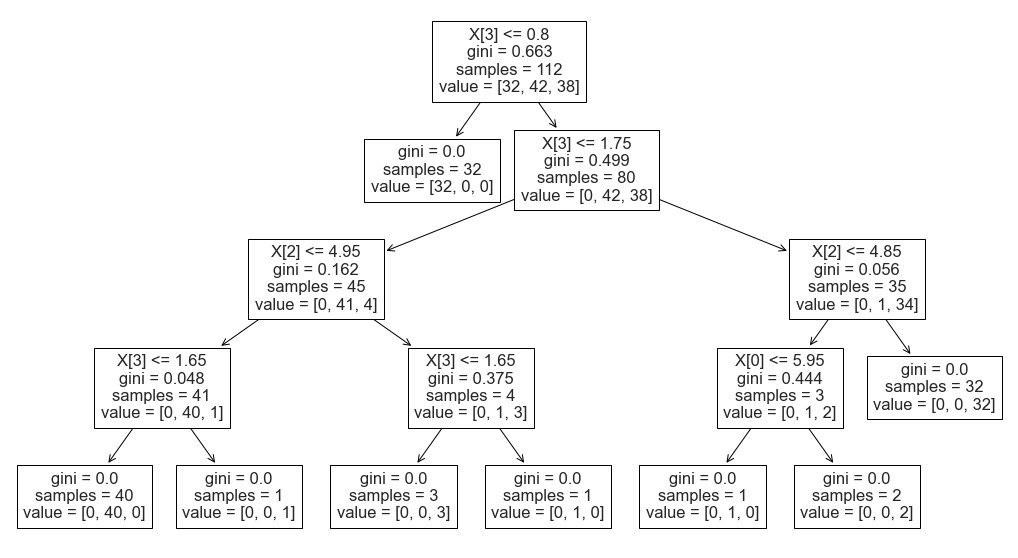

In [23]:
#Suurennetaan esitysaluetta oletuskoostaan suuremmaksi
plt.figure(figsize=(18, 10))

#Taustalle piiloon luotu päätöspuumalli esitetään plotaten graafisena visualisointina
tree.plot_tree(malli_2)
#Kirjastosta saatavat puun erilaiset toiminnallisuudet saa IDEssä esiin kirjoittamalla 'tree.'
#ja naputtelemalla tabulaattoria (tai CTRL+SPACE)

"Jokaisessa haarautumisessa algoritmi valitsee parhaiten erottelevan selittävän muuttujan ja siihen liittyvän rajakohdan.
<br>
Gini = millä todennäköisyydellä tehdään väärä luokittelu? Toimivassa päätöspuussa on haarautumisten jälkeen vain pieniä gini-arvoja."
<br>
<br>
Yllä olevassa päätöspuussa ylimmällä rivillä lähtötilanteessa X[2] viittaa terälehden pituuteen ('petal_length') If Then haaroituksessa booleania
* vasemmalle mennään jos 'petal_length' on yhtäsuuri tai pienempi kuin 2,45 ja muutoin mennään oikealle (aiemmin rivillä 8 huomattiin tiedon visualisoinnissa kuinka kaikki Setosat olivat eroteltävissa terälehden avulla)

In [24]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [25]:
#Vakiintuneen tavan mukaan feature matrix (selittävä muuttuja) on iso X
##Malli-olion predict-toiminnolla suoritetaan täysin uuden
##syötteen luokittelu kategoriaan
malli_2.predict(Xnew)

array(['setosa', 'virginica', 'setosa'], dtype=object)

Uudessa datasetissä ei yksinkertaisuuden vuoksi ollut kuin kolme havaintoa. Yllä olevasta tulosteesta näkee, että juuri koulutettu koneoppimisen algoritmi jakoi taulukon
* ensimmäisen rivin osalta Setosaksi
* toisen rivin osalta Virginicaksi
* kolmannen rivin osalta Versicoloriksi

### Ennakoivan analytiikan mallin sovitus datasettiin (3/4)
Koneoppimisessa kokeillaan erilaisia algoritmeja samaan historiadataan ja katsotaan mikä niistä arvaa parhaiten, kun ennustetta verrataan jo tiedossa oleviin toteumiin

#### 3. algoritmi kokeilu (ensimmäinen sovitusyritys: Miten malli sopii toteumaan) 

#### Gaussian Naive Bayes -menetelmässä
<br>
eri target kategorioihin luokittelussa feature matrixin selittävät muuttujat arvioidaan normaalijakauma-olettamalla, josta lasketaan todennäköisyys kategoriaan kuulumisesta
<br>
<br>
Suora copy+paste
<br>
"todennäköisyyksien lukuarvot eivät sellaisenaan ole luotettavia. Olennaista on mallin toteuttama luokittelu."
<br>
ja
<br>
"Mallin oletuksena on, että selittävien muuttujien arvot ovat kussakin luokassa toisistaan riippumattomia. Käytännössä Gaussian Naive Bayes toimii hyvin monenlaisten datojen kohdalla vaikka riippumattomuusoletus ei toteutuisikaan."
<br>
https://nbviewer.jupyter.org/github/taanila/tilastoapu/blob/master/iris_naive_bayes.ipynb

In [26]:
#random_state arvo määrittelee miten data erotellaan opetus- ja testidataan
##eri kokeilukerroilla tulee käyttää samaa arvoa (arvolla itsellään ei ole mitään merkitystä)
##sillä jos aineisto on jaettu eri tavalla osiin voi päätyä hyvinkin erilaiseen malliin
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)
###Käytännössä datasetissä otoksen jakamisen 'random_state' arvolla on
###jonkilainen vaikutus ennustusprosentin osumatarkkuuteen
### X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
#HUOM! Ennen tuotantoon deployausta toistetaan splittausta moneen eri kertaan eri jaotusarvoilla
#ja tuotantoon pääty niistä kokeiluista jonkilainen keskiarvon tyyppinen ratkaisu

#Katsotaan millaisiin paloihin jako tapahtui
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


In [27]:
#Ei asenneta Anacondassa vaan kerrotaan mistä "from foo.bar" tuodaan käytettäväksi "import lorem_ipsus"
##toiminnallisuus, joka perustuu Bayesin teoreemaan (Gaussian Naive Bayes -menetelmä)
from sklearn.naive_bayes import GaussianNB

#Luodaan malli-olio
malli_3 = GaussianNB()

#Ennustemallille annetaan parametreina:
#feature matrix (muutosta selittävät muuttujat) ja
#target (ennustettava muuttuja, joka muuttuu feature matrixin muutosten vuoksi)
malli_3.fit(X_train, y_train)
###komennolla fit() sovitetaan malli dataan. Se on se komento, jolla konetta opetetaan

#Olion sisältämät toiminnallisuudet saa IDEssä esiin kirjoittamalla 'malli.'
#ja naputtelemalla tabulaattoria (tai CTRL+SPACE)
malli_3.get_params()


{'priors': None, 'var_smoothing': 1e-09}

In [28]:
#Malli-olion predict-toiminnolla voidaan laskea ennuste opetusdatalle
y_train_malli_3 = malli_3.predict(X_train)
#Malli-olion predict-toiminnolla voidaan laskea ennuste testidatalle
y_test_malli_3 = malli_3.predict(X_test)

In [29]:
#Opetusdatalle lasketun ennusteen vertaaminen tiedossa oleville
#todellisille arvoille (label) ennustuksen osumatarkkuus prosentteina
accuracy_score(y_train, y_train_malli_3)

0.9642857142857143

In [30]:
#Testidatalle lasketun ennusteen vertaaminen tiedossa oleville
#todellisille arvoille (label) ennustuksen osumatarkkuus prosentteina
accuracy_score(y_test, y_test_malli_3)
##Algoritmi ei ole nähnyt testidataa koulutusvaiheessa ja testidatalla
##varmistetaan ettei ole ylimallinnettu koulutusvaiheessa

0.9736842105263158

In [31]:
#Opetusdatan osalta väärin ennustettujen esiin nostaminen 
print(confusion_matrix(y_train, y_train_malli_3))

[[32  0  0]
 [ 0 40  2]
 [ 0  2 36]]


Yllä olevassa Kurjenmiekat-kasvin taulukossa ovat lajikkeet Setosa, Versicolor ja Virginica. Talukkoa luetaan siten, että luotu ennustemalli on onnistunut ennustamaan
* ensimmäisellä rivillä (ja ensimmäisessä sarakkeessa) kaikki Setosat oikein
* keskimmäisellä rivillä (ja keskimmäisessä sarakkeessa) Versicolorista lähes kaikki oikein, mutta osa oli mennyt vahingossa viimeiseen sarakkeeseen Virginicalle
* viimeisellä rivillä (ja viimeisessä sarakkeessa) Virginicatista lähes kaikki oikein, mutta osa oli mennyt vahingossa keskimmäiseen sarakkeeseen Versicolorille

In [32]:
#Testidatan osalta väärin ennustettujen esiin nostaminen 
print(confusion_matrix(y_test, y_test_malli_3))
##Algoritmi ei ole nähnyt testidataa koulutusvaiheessa ja testidatalla
##varmistetaan ettei ole ylimallinnettu koulutusvaiheessa

[[18  0  0]
 [ 0  8  0]
 [ 0  1 11]]


Yllä olevassa Kurjenmiekat-kasvin taulukossa ovat lajikkeet Setosa, Versicolor ja Virginica. Talukkoa luetaan siten, että luotu ennustemalli on onnistunut ennustamaan
* ensimmäisellä rivillä (ja ensimmäisessä sarakkeessa) kaikki Setosat oikein
* keskimmäisellä rivillä (ja keskimmäisessä sarakkeessa) kaikki Versicolorista oikein
* viimeisellä rivillä (ja viimeisessä sarakkeessa) Virginicatista lähes kaikki oikein, mutta osa oli mennyt vahingossa keskimmäiseen sarakkeeseen Versicolorille 

In [33]:
#Vakiintuneen tavan mukaan feature matrix (selittävä muuttuja) on iso X
##Malli-olion predict-toiminnolla suoritetaan täysin uuden
##syötteen luokittelu kategoriaan
malli_3.predict(Xnew)

array(['setosa', 'virginica', 'versicolor'], dtype='<U10')

Uudessa datasetissä ei yksinkertaisuuden vuoksi ollut kuin kolme havaintoa. Yllä olevasta tulosteesta näkee, että juuri koulutettu koneoppimisen algoritmi jakoi taulukon
* ensimmäisen rivin osalta Setosaksi
* toisen rivin osalta Virginicaksi
* kolmannen rivin osalta Versicoloriksi

### Ennakoivan analytiikan mallin sovitus datasettiin (4/4)
Koneoppimisessa kokeillaan erilaisia algoritmeja samaan historiadataan ja katsotaan mikä niistä arvaa parhaiten, kun ennustetta verrataan jo tiedossa oleviin toteumiin

#### 4. algoritmi kokeilu (ensimmäinen sovitusyritys: Miten malli sopii toteumaan) 

#### Logistinen regressio -menetelmästä
voi lukea lisää sijainnissa https://tilastoapu.wordpress.com/2014/04/25/logistinen-regressio/
<br>
Logistisella regressiolla saadaan ennustavan luokittelun lisäksi myös hyviä todennäköisyyksiä luokittelun paikkaansapitävyydelle
<br>
<br>
Suora copy+paste
<br>
"Logistinen regressio on luokittelumenetelmä eikä sitä pidä sekoittaa tavalliseen regressioon."
<br>
https://nbviewer.jupyter.org/github/taanila/tilastoapu/blob/master/iris_logr.ipynb

In [34]:
#random_state arvo määrittelee miten data erotellaan opetus- ja testidataan
##eri kokeilukerroilla tulee käyttää samaa arvoa (arvolla itsellään ei ole mitään merkitystä)
##sillä jos aineisto on jaettu eri tavalla osiin voi päätyä hyvinkin erilaiseen malliin
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)
###Käytännössä datasetissä otoksen jakamisen 'random_state' arvolla on
###jonkilainen vaikutus ennustusprosentin osumatarkkuuteen
### X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
#HUOM! Ennen tuotantoon deployausta toistetaan splittausta moneen eri kertaan eri jaotusarvoilla
#ja tuotantoon pääty niistä kokeiluista jonkilainen keskiarvon tyyppinen ratkaisu

#Katsotaan millaisiin paloihin jako tapahtui
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


In [35]:
#Ei asenneta Anacondassa vaan kerrotaan mistä "from foo.bar" tuodaan käytettäväksi "import lorem_ipsus"
##toiminnallisuus, joka toteuttaa Logistisen regressiomallin
from sklearn.linear_model import LogisticRegression

#Luodaan malli-olio ja herjan vuoksi lisätään iteraatioita
malli_4 = LogisticRegression(max_iter = 10000)

#Ennustemallille annetaan parametreina:
#feature matrix (muutosta selittävät muuttujat) ja
#target (ennustettava muuttuja, joka muuttuu feature matrixin muutosten vuoksi)
malli_4.fit(X_train, y_train)
###komennolla fit() sovitetaan malli dataan. Se on se komento, jolla konetta opetetaan

#Olion sisältämät toiminnallisuudet saa IDEssä esiin kirjoittamalla 'malli.'
#ja naputtelemalla tabulaattoria (tai CTRL+SPACE)
malli_4.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [36]:
#Malli-olion predict-toiminnolla voidaan laskea ennuste opetusdatalle
y_train_malli_4 = malli_4.predict(X_train)
#Malli-olion predict-toiminnolla voidaan laskea ennuste testidatalle
y_test_malli_4 = malli_4.predict(X_test)

In [37]:
#Opetusdatalle lasketun ennusteen vertaaminen tiedossa oleville
#todellisille arvoille (label) ennustuksen osumatarkkuus prosentteina
accuracy_score(y_train, y_train_malli_4)

0.9910714285714286

In [38]:
#Testidatalle lasketun ennusteen vertaaminen tiedossa oleville
#todellisille arvoille (label) ennustuksen osumatarkkuus prosentteina
accuracy_score(y_test, y_test_malli_4)
##Algoritmi ei ole nähnyt testidataa koulutusvaiheessa ja testidatalla
##varmistetaan ettei ole ylimallinnettu koulutusvaiheessa

0.9736842105263158

In [39]:
#Opetusdatan osalta väärin ennustettujen esiin nostaminen 
print(confusion_matrix(y_train, y_train_malli_4))

[[32  0  0]
 [ 0 41  1]
 [ 0  0 38]]


In [40]:
#Testidatan osalta väärin ennustettujen esiin nostaminen 
print(confusion_matrix(y_test, y_test_malli_4))
##Algoritmi ei ole nähnyt testidataa koulutusvaiheessa ja testidatalla
##varmistetaan ettei ole ylimallinnettu koulutusvaiheessa

[[18  0  0]
 [ 0  7  1]
 [ 0  0 12]]


Yllä olevassa Kurjenmiekat-kasvin taulukossa ovat lajikkeet Setosa, Versicolor ja Virginica. Talukkoa luetaan siten, että luotu ennustemalli on onnistunut ennustamaan
* ensimmäisellä rivillä (ja ensimmäisessä sarakkeessa) kaikki Setosat oikein
* keskimmäisellä rivillä (ja keskimmäisessä sarakkeessa) Versicolorista lähes kaikki oikein, mutta osa oli mennyt vahingossa viimeiseen sarakkeeseen Virginicalle
* viimeisellä rivillä (ja viimeisessä sarakkeessa) kaikki Virginicatit oikein 

In [41]:
#Vakiintuneen tavan mukaan feature matrix (selittävä muuttuja) on iso X
##Malli-olion predict-toiminnolla suoritetaan täysin uuden
##syötteen luokittelu kategoriaan
malli_4.predict(Xnew)

array(['setosa', 'virginica', 'versicolor'], dtype=object)

Uudessa datasetissä ei yksinkertaisuuden vuoksi ollut kuin kolme havaintoa. Yllä olevasta tulosteesta näkee, että juuri koulutettu koneoppimisen algoritmi jakoi taulukon
* ensimmäisen rivin osalta Setosaksi
* toisen rivin osalta Virginicaksi
* kolmannen rivin osalta Versicoloriksi

In [42]:
#Logistisella regressiolla saadaan ennustavan luokittelun lisäksi
#myös hyviä todennäköisyyksiä luokittelun paikkaansapitävyydelle 
malli_4.predict_proba(Xnew)

array([[9.66304156e-01, 3.36957224e-02, 1.21399018e-07],
       [6.02376376e-07, 2.85094471e-02, 9.71489950e-01],
       [1.89745438e-01, 8.10077361e-01, 1.77201327e-04]])

Yllä olevaa taulukkoa luetaan siten, että taulukon ensimmäinen havainto on 96,63% todennäköisyydellä Setosa ja 3.37% todennäköisyydellä Versicolor sekä 0,00001% todennäköisyydellä Virginica

In [43]:
from datetime import datetime
print(f'Lopeteltu {datetime.now()}')

Lopeteltu 2021-06-29 21:24:01.603072
